# Денисов В.С.

Импорт нужных библиотек

In [11]:
import numpy as np
import time
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import multiprocessing as mp
from tqdm import tqdm

%matplotlib inline

Здесь создаю отдельные массивы для больных и здоровых. Как Вы уже сказали, это неверно, нужно работать со столбцами отдельно, это поправлю в дальнейшем.

In [2]:
data = pd.read_csv('Вячеслав Сергеевич Денисов.csv', dtype='str')
print(data)
data.loc[:,"p_cncr5110":"p_cncr7481"] = (data.loc[:,"p_cncr5110":"p_cncr7481"]).astype(float)

cncr_data = data.filter(like='cncr', axis=1)
cncr_data = cncr_data.astype(float)
cntrl_data = data.filter(like='cntrl', axis=1)
cntrl_data = cntrl_data.astype(float)

cncr_sumr = cncr_data.sum(axis=1)
cntrl_sumr = cntrl_data.sum(axis=1)

cncr_sum = cncr_sumr.sum(axis=0)
cntrl_sum = cntrl_sumr.sum(axis=0)

cncr_sumn = cncr_sumr.to_numpy()
cntrl_sumn = cntrl_sumr.to_numpy()

print(data)
print(cntrl_data)
print(cntrl_sumr)
print(cntrl_sum)



                Unnamed: 0 p_cncr5110 p_cncr9580 p_cncr4211 p_cntrl2241  \
0     11001010110010011111      25051       3744     106996        2404   
1     00110011000111010110       2759    3351775       1721      269212   
2     00110101111100000101        366      43126       5503       15972   
3     00010001010110010101      83066        502       4209        2719   
4     10011001011011100101      72614      39131         47     2454137   
...                    ...        ...        ...        ...         ...   
4980  11011101110000101001      21872       6076    2476716       34320   
4981  00011001111011010001      95779     515839        413       87363   
4982  01000110001110101001   19144791    1606611      16090       14842   
4983  10001111010100000010     620875      81935      43341      157013   
4984  00101110010001011001     238683     259941     149173       42355   

     p_cncr6852 p_cncr5544 p_cntrl9937 p_cntrl1122 p_cncr4638  ... p_cncr1414  \
0       4481376   

Здесь сделал аналог "dummies" для генов.

In [3]:
for i in range (len(data.loc[0:0,"Unnamed: 0"][0])):
    for j in range(len(data)):
        data.loc[j,'DNA_pos %d'%(i)]=float(data.loc[j,"Unnamed: 0"][i])
        
data.head()

,Unnamed: 0,p_cncr5110,p_cncr9580,p_cncr4211,p_cntrl2241,p_cncr6852,p_cncr5544,p_cntrl9937,p_cntrl1122,p_cncr4638,...,DNA_pos 10,DNA_pos 11,DNA_pos 12,DNA_pos 13,DNA_pos 14,DNA_pos 15,DNA_pos 16,DNA_pos 17,DNA_pos 18,DNA_pos 19
0,11001010110010011111,25051.0,3744.0,106996.0,2404.0,4481376.0,7462.0,5559.0,966838.0,563781.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,00110011000111010110,2759.0,3351775.0,1721.0,269212.0,27450.0,10412.0,55573.0,2466628.0,15682.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,00110101111100000101,366.0,43126.0,5503.0,15972.0,7561.0,198410.0,2696.0,1646503.0,25109.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,00010001010110010101,83066.0,502.0,4209.0,2719.0,1606.0,125730.0,19689.0,40740.0,146964.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,10011001011011100101,72614.0,39131.0,47.0,2454137.0,30944.0,3658.0,564190.0,1355178.0,168096.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


Здесь считаю частоты для 20 переменных через numpy.

In [16]:
gen1 = np.zeros((20,3))
gen2 = np.zeros((20,4))
for i in range (0, len(data[['Unnamed: 0']].iloc[0,0])):
    for j in range (0, data[['Unnamed: 0']].shape[0]):
        if int(data[['Unnamed: 0']].iloc[j, 0][i]) == int(1):
            gen1[i,0] = gen1[i,0] + cncr_sumr[j]
            gen2[i,0] = gen2[i,0] + cncr_sumr[j]
            gen1[i,1] = gen1[i,1] + cntrl_sumr[j]
            gen2[i,1] = gen2[i,1] + cntrl_sumr[j]
        else:
            continue
        gen1[i,2] = (gen1[i,0] + gen1[i,1])/(cncr_sum + cntrl_sum)
        gen2[i,2] = gen2[i,0]/(gen2[i,0] + gen1[i,1])
        gen2[i,3] = gen1[i,1]/(gen2[i,0] + gen1[i,1])
                       

In [15]:
print(len(data[['Unnamed: 0']].iloc[0, 0]))
print(data[['Unnamed: 0']].iloc[1, 0][2])
df1 = pd.DataFrame(data=gen1[0:,0:], index=[i+1 for i in range(gen1.shape[0])], columns=['N_cncr', 'N_cntrl', 'Nu'])
df2 = pd.DataFrame(data=gen2[0:,0:], index=[i+1 for i in range(gen1.shape[0])], columns=['N_cncr', 'N_cntrl', 'Nu_cncr', 'Nu_cntrl'])
df1

20
1


,N_cncr,N_cntrl,Nu
1,4.684837e+10,2.680607e+10,0.501077
2,4.772010e+10,2.372713e+10,0.486061
3,4.843780e+10,2.634268e+10,0.508737
4,3.515244e+10,3.015363e+10,0.444282
5,4.838085e+10,2.622421e+10,0.507544
6,4.909332e+10,2.614094e+10,0.511824
7,5.725782e+10,2.204293e+10,0.539489
8,4.892124e+10,2.441956e+10,0.498943
9,4.761427e+10,2.566532e+10,0.498527
10,5.569757e+10,2.105371e+10,0.522145


Здесь подсчет 760 переменных, идет 9500+ сек.

In [79]:
gen760 = np.zeros((190, 4))
var = pd.DataFrame(columns = ['Var'])
start = time.perf_counter()
for i in range (0, data[['Unnamed: 0']].shape[0]):
    l = 0
    for j in range (0, len(data[['Unnamed: 0']].iloc[0,0])-1):
        vect = data[['Unnamed: 0']].iloc[0, 0][j+1:]
        product = it.product(data[['Unnamed: 0']].iloc[0, 0][j], vect)
        #print(product)
        for v1, v2 in product:
        
            if v1 + v2 == '00':
                gen760[l,0] = gen760[l,0] + cncr_sumr[0]
                
            elif v1 + v2 == '01':
                gen760[l,1] = gen760[l,1] + cncr_sumr[0]
                
            elif v1 + v2 == '10':
                gen760[l,2] = gen760[l,2] + cncr_sumr[0]
                
            elif v1 + v2 == '11':
                gen760[l,3] = gen760[l,3] + cncr_sumr[0]
                
            else:
                continue
            l = l + 1
            var = var.append({'Var':str(j) + str(j+1)}, ignore_index=True)

end = time.perf_counter()
print (f'Singlethreaded {end - start}')
print(gen760)

Singlethreaded 9546.1556685
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.04821877e+10]
 [0.00000000e+00 0.00000000e+00 5.04821877e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.04821877e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.04821877e+10]
 [0.00000000e+00 0.00000000e+00 5.04821877e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.04821877e+10]
 [0.00000000e+00 0.00000000e+00 5.04821877e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.04821877e+10]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.04821877e+10]
 [0.00000000e+00 0.00000000e+00 5.04821877e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.04821877e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.04821877e+10]
 [0.00000000e+00 0.00000000e+00 5.04821877e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.04821877e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.04821877e+10]
 [0.00000000e+00 0.00000000

Далее попробовал улучшения - через функцию.

In [80]:
gen760 = np.zeros((190, 4))
gen780 = np.zeros((190, 4))
    

#for j in range (0, len(data[['Unnamed: 0']].iloc[0,0])):
def MVar(j,l):
    var = pd.DataFrame(columns = ['Var'])
    for k in range (j+1, len(data[['Unnamed: 0']].iloc[0,0])):
        if data[['Unnamed: 0']].iloc[0, 0][j] + data[['Unnamed: 0']].iloc[0, 0][k] == '00':
            gen780[l,0] = gen780[l,0] + cncr_sumr[0]
                
        elif data[['Unnamed: 0']].iloc[0, 0][j] + data[['Unnamed: 0']].iloc[0, 0][k] == '01':
            gen780[l,1] = gen780[l,1] + cncr_sumr[0]
                
        elif data[['Unnamed: 0']].iloc[0, 0][j] + data[['Unnamed: 0']].iloc[0, 0][k] == '10':
            gen780[l,2] = gen780[l,2] + cncr_sumr[0]
                
        elif data[['Unnamed: 0']].iloc[0, 0][j] + data[['Unnamed: 0']].iloc[0, 0][k] == '11':
            gen780[l,3] = gen780[l,3] + cncr_sumr[0]
                
        else:
            continue
        var = var.append({'Var': data[['Unnamed: 0']].iloc[i, 0][j] + data[['Unnamed: 0']].iloc[i, 0][k] + str(j) + str(k)}, ignore_index=True)
        
    
start = time.perf_counter()
l=0    
for j in range(0, len(data[['Unnamed: 0']].iloc[0,0])):
    MVar(j,l)
    l = l + 1
    
end = time.perf_counter()

#if __name__ == '__main__':
 #   arr00 = Array('i', range(190))
  #  arr01 = Array('i', range(190)) 
   # arr10 = Array('i', range(190))
    #arr11 = Array('i', range(190)) 
    #pool = mp.Pool()
    #gen780 = pool.map(MVar, ( j for j in range(0, len(data[['Unnamed: 0']].iloc[0,0]))))

#print(gen760)
print(gen780)
print (f'Singlethreaded {end - start}')

[[0.00000000e+00 0.00000000e+00 8.10145440e+07 1.11394998e+08]
 [0.00000000e+00 0.00000000e+00 8.10145440e+07 1.01268180e+08]
 [7.08877260e+07 1.01268180e+08 0.00000000e+00 0.00000000e+00]
 [6.07609080e+07 1.01268180e+08 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.07609080e+07 9.11413620e+07]
 [5.06340900e+07 9.11413620e+07 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.06340900e+07 8.10145440e+07]
 [4.05072720e+07 8.10145440e+07 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.05072720e+07 7.08877260e+07]
 [0.00000000e+00 0.00000000e+00 4.05072720e+07 6.07609080e+07]
 [3.03804540e+07 6.07609080e+07 0.00000000e+00 0.00000000e+00]
 [2.02536360e+07 6.07609080e+07 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.02536360e+07 5.06340900e+07]
 [1.01268180e+07 5.06340900e+07 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.06340900e+07 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.050727

In [6]:
df_ = pd.DataFrame(columns = ['Var'])
df_ = df_.append({'Var': data[['Unnamed: 0']].iloc[0, 0][0] + data[['Unnamed: 0']].iloc[0, 0][1]}, ignore_index=True)
var

,Var


Здесь для примера взял у другого человека рабочий вариант многопоточности. Не работает.

In [11]:
def stream(df_):
    comb= []
    for i in range (20):
        for j in range (i+1, 20):
            comb.append([i,j])
    pair=[[0,0],[0,1],[1,0],[1,1]]
    
    for i in tqdm(range (len(comb))):
        for j in range(len(pair)):
            col = '[%d,%d]_(%d,%d)'%(comb[i][0],comb[i][1],pair[j][0],pair[j][1])
            for k in df_.index.tolist():
                if (df_['DNA_pos %d'%(comb[i][0])][k]==pair[j][0])and(df_['DNA_pos %d'%(comb[i][1])][k]==pair[j][1]):
                    df_.loc[k:k,col] = 1
                else:
                    df_.loc[k:k,col] = 0
    return df_

In [12]:
def parallelize_dataframe(df, func):
    num_partitions = 12
    num_workers = 12
    df_split = np.array_split(df, num_partitions)
    pool = mp.Pool(num_workers)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [ ]:
data = parallelize_dataframe(data,stream)

Тут использовал библиотеку itertools. Время заметно уменьшилось, но все равно, даже с ним вышло 9500+ сек.

In [76]:
var = var.append({'Var': str(j) + str(k)}, ignore_index=True)
gen760 = np.zeros((190, 4))
l = 0
start = time.perf_counter()
for j in range (0, len(data[['Unnamed: 0']].iloc[0,0])-1):
    vect = data[['Unnamed: 0']].iloc[0, 0][j+1:]
    product = it.product(data[['Unnamed: 0']].iloc[0, 0][j], vect)
    #print(product)
    for v1, v2 in product:
        
        if v1 + v2 == '00':
            gen760[l,0] = gen760[l,0] + cncr_sumr[0]
                
        elif v1 + v2 == '01':
            gen760[l,1] = gen760[l,1] + cncr_sumr[0]
                
        elif v1 + v2 == '10':
            gen760[l,2] = gen760[l,2] + cncr_sumr[0]
                
        elif v1 + v2 == '11':
            gen760[l,3] = gen760[l,3] + cncr_sumr[0]
                
        else:
            continue
        l = l + 1
        var = var.append({'Var':str(j) + str(j+1)}, ignore_index=True)

end = time.perf_counter()
print (f'Singlethreaded {end - start}')
print(gen760)

Singlethreaded 0.32106540000131645
[[       0.        0.        0. 10126818.]
 [       0.        0. 10126818.        0.]
 [       0.        0. 10126818.        0.]
 [       0.        0.        0. 10126818.]
 [       0.        0. 10126818.        0.]
 [       0.        0.        0. 10126818.]
 [       0.        0. 10126818.        0.]
 [       0.        0.        0. 10126818.]
 [       0.        0.        0. 10126818.]
 [       0.        0. 10126818.        0.]
 [       0.        0. 10126818.        0.]
 [       0.        0.        0. 10126818.]
 [       0.        0. 10126818.        0.]
 [       0.        0. 10126818.        0.]
 [       0.        0.        0. 10126818.]
 [       0.        0.        0. 10126818.]
 [       0.        0.        0. 10126818.]
 [       0.        0.        0. 10126818.]
 [       0.        0.        0. 10126818.]
 [       0.        0. 10126818.        0.]
 [       0.        0. 10126818.        0.]
 [       0.        0.        0. 10126818.]
 [       0.        

In [ ]:
Регрессия для 20 переменных.

In [8]:
regr_df = pd.DataFrame()
for i in tqdm(data.columns[1:31]):
    for j in data.columns[31:]:

        temp = data[data[j] == 1][[j, i]]
        N = sum(data[i])
        regr_df.loc[i,j] = sum(temp[i])/ N

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 13.01it/s]


In [12]:
Class = pd.DataFrame() 
for i in regr_df.index:
    if i [:6] == 'p_cncr':
        Class.loc[i,'Class'] = 1
    else:
        Class.loc[i,'Class'] = 0
Class.head()
score = []
var = []
for i in tqdm(regr_df.columns):
    X = np.array(regr_df[i])
    X = np.reshape(X, (-1,1))
    Y = np.array(Class['Class'])
    
    clf = LogisticRegression(penalty = 'none').fit(X, Y)
    score.append(clf.score(X, Y))
    var.append(i)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 210.50it/s]


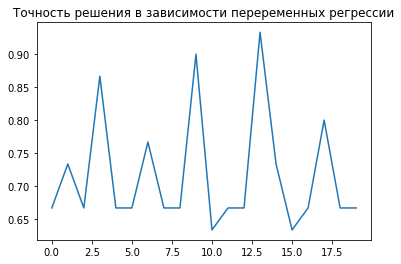

In [13]:
plt.title('Точность решения в зависимости переременных регрессии')
plt.plot(score)